In [ ]:
# To aviod the influence of the hub(nodes with )
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

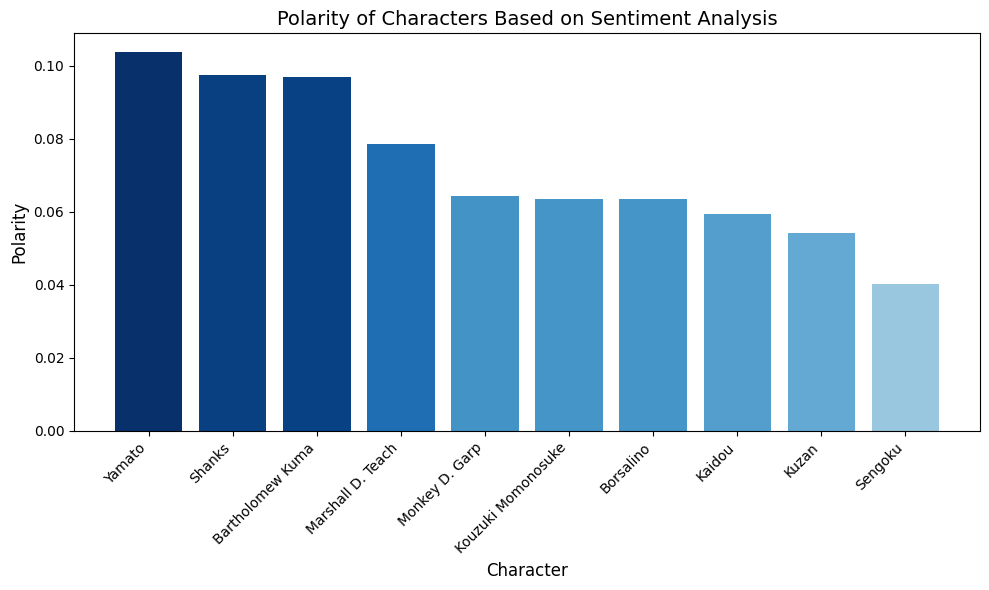

In [37]:
# Define the file path for the GEXF network file
file_path = '../networks/One_Piece.gexf'

# Load the GEXF file into a NetworkX graph
G = nx.read_gexf(file_path)

# Calculate degrees and sort them in descending order
degrees = dict(G.degree())
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
top_k_nodes = sorted_degrees[:10]  # Select top 10 nodes by degree

# Define the folder path containing the text files
folder_path = '../onepiece_cleaned'  # Replace with the actual path

# Function to find files matching the top nodes
def find_top_degree_nodes(folder_path, top_nodes):
    matched_files = []
    for node, degree in top_nodes:
        for file in os.listdir(folder_path):
            # Match files that start with the node name and end with '.txt'
            if file.startswith(node) and file.endswith('.txt'):
                matched_files.append((file, node))
    return matched_files

# Find the files matching the top degree nodes
matched_files = find_top_degree_nodes(folder_path, top_k_nodes)

# Initialize a list to store results
analysis_results = []

# Perform TextBlob sentiment analysis on each matched file
for file_name, node_name in matched_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            # Perform TextBlob sentiment analysis
            blob = TextBlob(text)
            polarity = blob.sentiment.polarity  # Range: -1 (negative) to 1 (positive)
            subjectivity = blob.sentiment.subjectivity  # Range: 0 (objective) to 1 (subjective)
            # Store the results
            analysis_results.append({
                "Node": node_name,
                "File": file_name,
                "Polarity": polarity,
                "Subjectivity": subjectivity
            })
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(analysis_results)

# Sort the data by polarity for visualization
results_df = results_df.sort_values(by="Polarity", ascending=False)

# Plotting the Polarity Bar Chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(results_df['Polarity'] / max(results_df['Polarity']))  # Scale color intensity
plt.bar(results_df['Node'], results_df['Polarity'], color=colors)
plt.xlabel('Character', fontsize=12)
plt.ylabel('Polarity', fontsize=12)
plt.title('Polarity of Characters Based on Sentiment Analysis', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
